
=== Monthly Average Performance (by final_amount) ===
month
11    46.58
8     46.00
1     42.73
3     41.86
12    41.82
9     41.35
10    41.19
4     40.12
6     40.02
5     39.37
2     39.17
7     38.19
Name: final_amount, dtype: float64

=== Best and Worst Month Overall (by total final_amount) ===
Best Month (by total final amount): Month 3
Worst Month (by total final amount): Month 6

=== Monthly Changes in Total Final Amount ===
month
1         NaN
2       52.79
3     1742.18
4    -1424.00
5      345.13
6    -1162.46
7      758.04
8      -96.79
9     -297.89
10    1539.95
11    -460.44
12   -1259.18
Name: final_amount, dtype: float64


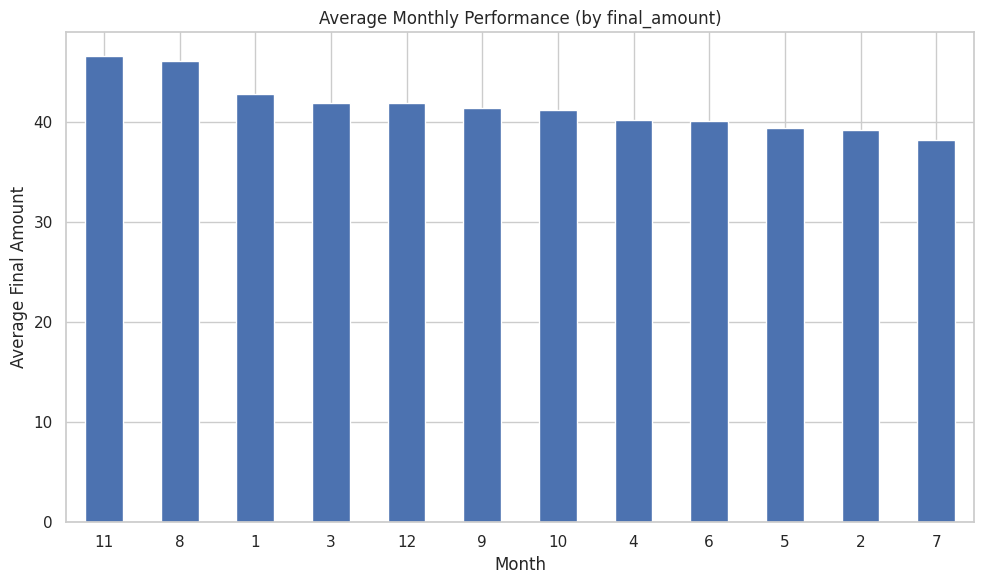

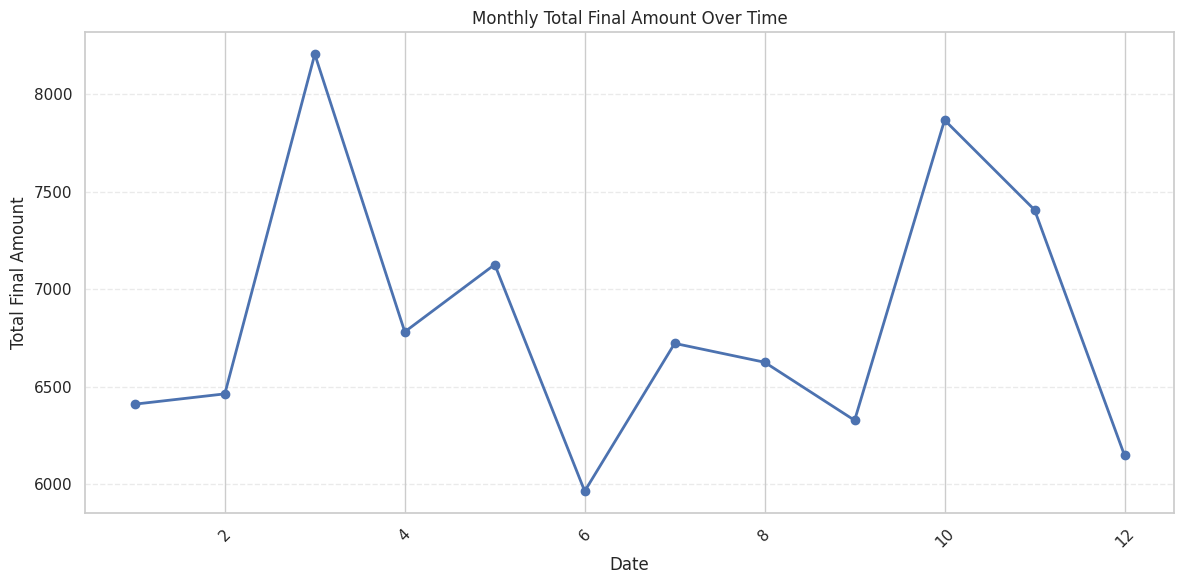

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("grocery_chain_data.csv")
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.set_index('transaction_date', inplace=True)

df['month'] = df.index.month
yearly_avg = df.groupby('month')['final_amount'].mean().round(2).sort_values(ascending=False)

monthly_total = df.groupby('month')['final_amount'].sum()
best_month = monthly_total.idxmax()
worst_month = monthly_total.idxmin()


print("\n=== Monthly Average Performance (by final_amount) ===")
print(yearly_avg)
print("\n=== Best and Worst Month Overall (by total final_amount) ===")
print(f"Best Month (by total final amount): Month {best_month}")
print(f"Worst Month (by total final amount): Month {worst_month}")

monthly_changes = monthly_total.diff().round(2)
print("\n=== Monthly Changes in Total Final Amount ===")
print(monthly_changes)
plt.figure(figsize=(10,6))
yearly_avg.plot(kind='bar')
plt.title("Average Monthly Performance (by final_amount)")
plt.xlabel("Month")
plt.ylabel("Average Final Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
monthly_total.plot(marker='o', linewidth=2)
plt.title("Monthly Total Final Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Final Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()